In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import csv as csv

In [2]:
train = pd.read_csv('application_train.csv')

In [3]:
pd.set_option('display.max_columns', None)
train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
train.shape

(307511, 122)

In [5]:
train['documents'] =  np.sum(train.iloc[:,96:116] , axis = 1)

In [6]:
train['enquiries'] =  np.sum(train.iloc[:,116:122] , axis = 1)

In [7]:
train['phone'] =  np.sum(train.iloc[:,22:25] , axis = 1)

In [8]:
train.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis =1, inplace = True)

In [9]:
train.shape

(307511, 97)

In [103]:
train['ORGANIZATION_TYPE'].value_counts()

Business               84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

In [10]:
train['ORGANIZATION_TYPE'].replace({ 'Business Entity Type 3': 'Business','Business Entity Type 2':'Business','Business Entity Type 1':'Business',
                                    'Industry: type 1': 'Industry','Industry: type 2': 'Industry','Industry: type 3': 'Industry','Industry: type 4': 'Industry',
                                   'Industry: type 5': 'Industry','Industry: type 6': 'Industry','Industry: type 7': 'Industry','Industry: type 8': 'Industry',
                                   'Industry: type 9': 'Industry','Industry: type 9': 'Industry','Industry: type 10': 'Industry','Industry: type 11': 'Industry',
                                   'Industry: type 12': 'Industry','Industry: type 13': 'Industry','Trade: type 1':'Trade','Trade: type 2':'Trade',
                                   'Trade: type 3':'Trade','Trade: type 4':'Trade','Trade: type 5':'Trade','Trade: type 6':'Trade','Trade: type 7':'Trade',
                                   'Transport: type 1':'Transport','Transport: type 2':'Transport','Transport: type 3':'Transport',
                                   'Transport: type 4':'Transport'},inplace = True)

In [11]:

train["DAYS_EMPLOYED"].replace(365243.0,np.nan,inplace=True)

train["DAYS_EMPLOYED"].replace(to_replace = np.nan,value = train["DAYS_EMPLOYED"].median(), inplace=True)


In [12]:
train['YEARS_EMPLOYED'] = -train['DAYS_EMPLOYED']/365
train['AGE']  = -train['DAYS_BIRTH']/365
train['DAYS_ID_PUBLISH'] = -train['DAYS_ID_PUBLISH']
train['DAYS_REGISTRATION'] = -train['DAYS_REGISTRATION']


In [13]:
train.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis = 1,inplace = True)

In [14]:
train.shape

(307511, 97)

In [15]:
train.isnull().sum().sum()

8903351

In [16]:
nd = train.select_dtypes(include=[np.number])
cd = train.select_dtypes(exclude=[np.number])  

In [17]:
nd  = nd.fillna(nd.median()) 

In [18]:
nd.isnull().sum().sum()

0

In [19]:
cd['NAME_TYPE_SUITE'].replace(to_replace = np.NaN,value = cd['NAME_TYPE_SUITE'].mode(), inplace=True)
cd['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = cd['OCCUPATION_TYPE'].mode(), inplace=True)
cd['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = cd['FONDKAPREMONT_MODE'].mode(), inplace=True)
cd['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = cd['HOUSETYPE_MODE'].mode(), inplace=True)
cd['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = cd['WALLSMATERIAL_MODE'].mode(), inplace=True)
cd['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = cd['EMERGENCYSTATE_MODE'].mode(), inplace=True)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
cd=pd.get_dummies(data=cd,columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],drop_first=True)

In [21]:
 cd.drop(['CODE_GENDER_XNA','NAME_INCOME_TYPE_Maternity leave','NAME_FAMILY_STATUS_Unknown'],axis = 1,inplace = True)

In [22]:

cd.isna().any()[lambda x: x]

Series([], dtype: bool)

In [23]:
nd.isna().any()[lambda x: x]

Series([], dtype: bool)

In [24]:
df = pd.concat([nd,cd],axis = 1)

In [25]:
df.shape

(307511, 179)

In [26]:
nd.shape

(307511, 81)

In [27]:
test  = pd.read_csv('application_test.csv')

In [28]:
test['documents'] =  np.sum(test.iloc[:,95:115] , axis = 1)

In [29]:
test['phone'] =  np.sum(test.iloc[:,21:24] , axis = 1)

In [30]:
test['enquiries'] =  np.sum(test.iloc[:,115:121] , axis = 1)

In [31]:
test.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis =1, inplace = True)

In [32]:
test['ORGANIZATION_TYPE'].replace({ 'Business Entity Type 3': 'Business','Business Entity Type 2':'Business','Business Entity Type 1':'Business',
                                    'Industry: type 1': 'Industry','Industry: type 2': 'Industry','Industry: type 3': 'Industry','Industry: type 4': 'Industry',
                                   'Industry: type 5': 'Industry','Industry: type 6': 'Industry','Industry: type 7': 'Industry','Industry: type 8': 'Industry',
                                   'Industry: type 9': 'Industry','Industry: type 9': 'Industry','Industry: type 10': 'Industry','Industry: type 11': 'Industry',
                                   'Industry: type 12': 'Industry','Industry: type 13': 'Industry','Trade: type 1':'Trade','Trade: type 2':'Trade',
                                   'Trade: type 3':'Trade','Trade: type 4':'Trade','Trade: type 5':'Trade','Trade: type 6':'Trade','Trade: type 7':'Trade',
                                   'Transport: type 1':'Transport','Transport: type 2':'Transport','Transport: type 3':'Transport',
                                   'Transport: type 4':'Transport'},inplace = True)

In [33]:
test["DAYS_EMPLOYED"].replace(365243.0,np.nan,inplace=True)

test["DAYS_EMPLOYED"].replace(to_replace = np.nan,value = test["DAYS_EMPLOYED"].median(), inplace=True)

In [34]:
test['YEARS_EMPLOYED'] = -test['DAYS_EMPLOYED']/365
test['AGE']  = -test['DAYS_BIRTH']/365
test['DAYS_ID_PUBLISH'] = -test['DAYS_ID_PUBLISH']
test['DAYS_REGISTRATION'] = -test['DAYS_REGISTRATION']

In [35]:
test.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis = 1,inplace = True)

In [36]:
nd1 = test.select_dtypes(include=[np.number])
cd1 = test.select_dtypes(exclude=[np.number])

In [37]:
nd1  = nd1.fillna(nd1.median()) 

In [38]:
nd1.isnull().sum().sum()

0

In [39]:
cd1['NAME_TYPE_SUITE'].replace(to_replace = np.NaN,value = cd1['NAME_TYPE_SUITE'].mode(), inplace=True)
cd1['OCCUPATION_TYPE'].replace(to_replace = np.nan,value = cd1['OCCUPATION_TYPE'].mode(), inplace=True)
cd1['FONDKAPREMONT_MODE'].replace(to_replace = np.nan,value = cd1['FONDKAPREMONT_MODE'].mode(), inplace=True)
cd1['HOUSETYPE_MODE'].replace(to_replace = np.nan,value = cd1['HOUSETYPE_MODE'].mode(), inplace=True)
cd1['WALLSMATERIAL_MODE'].replace(to_replace = np.nan,value = cd1['WALLSMATERIAL_MODE'].mode(), inplace=True)
cd1['EMERGENCYSTATE_MODE'].replace(to_replace = np.nan,value = cd1['EMERGENCYSTATE_MODE'].mode(), inplace=True)

In [40]:
cd1=pd.get_dummies(data=cd1,columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],drop_first=True)

In [41]:
cd1.isna().any()[lambda x: x]

Series([], dtype: bool)

In [42]:
df1 = pd.concat([nd1,cd1],axis = 1)

In [43]:
X = df.drop(['TARGET','SK_ID_CURR'],axis =1)
y= df['TARGET']

In [44]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_15,documents,enquiries,phone,YEARS_EMPLOYED,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper

In [45]:
X.shape

(307511, 177)

In [46]:
DF = X.drop(X.iloc[:,22:68],axis = 1)
DF2 = X.iloc[:,22:68] 
DF2['REGION_POPULATION_RELATIVE'] = X['REGION_POPULATION_RELATIVE']
DF.drop(['REGION_POPULATION_RELATIVE'],axis = 1,inplace=True)


In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
DF=pd.DataFrame(minmax.fit_transform(DF),columns=DF.columns)

In [48]:
X = pd.concat([DF,DF2],axis = 1)

In [49]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_15,documents,enquiries,phone,YEARS_EMPLOYED,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAR

In [50]:
X.shape

(307511, 177)

In [51]:
df1.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_15,documents,phone,enquiries,YEARS_EMPLOYED,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MO

In [52]:
df1.iloc[:,23:69]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,0.7552,0.0227,0.00,0.1379,0.1250,0.2083,0.0483,0.0756,0.0505,0.0000,0.0038,0.0672,0.0612,0.9732,0.7583,0.0203,0.0000,0.1379,0.1250,0.2083,0.0462,0.0817,0.0526,0.0000,0.0012,0.0666,0.0590,0.9732,0.7585,0.0223,0.00,0.1379,0.1250,0.2083,0.0488,0.0770,0.0514,0.0000,0.0031,0.0392
1,0.564990,0.291656,0.432962,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,0.0707
2,0.506771,0.699787,0.610991,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,0.0707
3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042,0.2404,0.3673,0.0386,0.0800,0.3109,0.2049,0.9970,0.9608,0.1176,0.3222,0.2759,0.3750,0.0417,0.2089,0.2626,0.3827,0.0389,0.0847,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.3750,0.0417,0.2078,0.2446,0.3739,0.0388,0.0817,0.3700
4,0.202145,0.425687,0.519097,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,0.0707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.506771,0.648575,0.643026,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,0.0707
48740,0.506771,0.684596,0.519097,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,0.0707
48741,0.733503,0.632770,0.283712,0.1113,0.1364,0.9955,0.7552,0.0227,0.16,0.1379,0.3333,0.2083,0.0483,0.0756,0.1383,0.0000,0.0542,0.1134,0.1415,0.9955,0.7583,0.0203,0.1611,0.1379,0.3333,0.2083,0.0462,0.0817,0.1441,0.0000,0.0574,0.1124,0.1364,0.9955,0.7585,0.0223,0.16,0.1379,0.3333,0.2083,0.0488,0.0770,0.1408,0.0000,0.0554,0.1663
48742,0.373090,0.445701,0.595456,0.1629,0.0723,0.9896,0.7552,0.0227,0.16,0.0690,0.6250,0.2083,0.0483,0.0756,0.1563,0.0000,0.1490,0.1660,0.0750,0.9896,0.7583,0.0203,0.1611,0.0690,0.6250,0.2083,0.0462,0.0817,0.1204,0.0000,0.1577,0.1645,0.0723,0.9896,0.7585,0.0223,0.16,0.0690,0.6250,0.2083,0.0488,0.0770,0.1591,0.0000,0.1521,0.1974


In [53]:
DF1 = df1.drop(df1.iloc[:,23:69],axis = 1)
DF21 = df1.iloc[:,23:69] 
DF21['REGION_POPULATION_RELATIVE'] = df1['REGION_POPULATION_RELATIVE']
DF1.drop(['REGION_POPULATION_RELATIVE'],axis = 1,inplace=True)



In [54]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
DF1=pd.DataFrame(minmax.fit_transform(DF1),columns=DF1.columns)

In [55]:
df1 = pd.concat([DF1,DF21],axis = 1)

In [56]:
df1.shape

(48744, 178)

In [57]:
df1.drop(['SK_ID_CURR'],axis =1,inplace = True)

In [58]:
df1.shape

(48744, 177)

In [59]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_15,documents,enquiries,phone,YEARS_EMPLOYED,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAR

In [60]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression()
lin_reg.fit(X, y)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [61]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [[ 4.45779601e-01  5.02212204e-02  1.40466369e+00  2.70584465e+00
  -2.64138813e+00 -2.51438776e-01 -3.23208891e-01  4.80990576e-01
  -3.76217430e-01 -7.94333290e-02 -9.36318538e-02  4.85891325e-01
  -3.44547585e-01  6.47007630e-01 -1.20151487e-01 -3.09992388e-01
   1.40724347e-01 -2.22053894e-01  2.15580514e-01 -1.09869678e-01
   9.83421944e-02  2.51941171e-01  1.91323905e+00  2.47992741e-01
   2.01948445e+00  3.10305781e-01 -6.50694489e-01 -7.16458019e-01
  -6.58779876e-01  2.68937891e-01 -1.15329655e+00  1.77190708e-01
  -5.46784991e-01  2.76959950e-01 -3.06592575e-01  5.67254334e-02
   2.69000433e-02  1.53187978e-02  6.90560299e-03  1.89128503e-01
   2.75878249e-04  6.18163943e-02  6.21212675e-02 -3.13654370e-01
   5.45813995e-02 -1.56952830e-01  6.09635431e-01  1.66471169e-01
   1.17871725e-01  2.09527257e-01  5.55834017e-01  4.34770151e-01
  -1.70607999e-01 -1.56355655e-05 -2.61982224e-02 -1.61326179e-01
   1.36585114e-01  2.78149309e-01 -4.52105838e-02  2.06214843e

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [63]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index] 

Train: [ 61465  61466  61467 ... 307508 307509 307510] Test: [    0     1     2 ... 61814 61816 61828]
Train: [     0      1      2 ... 307508 307509 307510] Test: [ 61465  61466  61467 ... 123093 123094 123095]
Train: [     0      1      2 ... 307508 307509 307510] Test: [121993 122029 122030 ... 184624 184625 184626]
Train: [     0      1      2 ... 307508 307509 307510] Test: [183271 183273 183278 ... 246095 246097 246099]
Train: [     0      1      2 ... 246095 246097 246099] Test: [244997 245014 245015 ... 307508 307509 307510]


In [64]:
print("Before OverSampling, counts of label '1':",np.sum(y_train == 1))
print("Before OverSampling, counts of label '0':",np.sum(y_train == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_train_res, y_train_res = smt.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 17374
Before OverSampling, counts of label '0': 197883
After OverSampling, the shape of train_X: (395766, 177)
After OverSampling, the shape of train_y: (395766,) 

After OverSampling, counts of label '1': 197883
After OverSampling, counts of label '0': 197883


In [65]:
print("Before OverSampling, counts of label '1':",np.sum(y == 1))
print("Before OverSampling, counts of label '0':",np.sum(y == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_res, y_res = smt.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 24825
Before OverSampling, counts of label '0': 282686
After OverSampling, the shape of train_X: (565372, 177)
After OverSampling, the shape of train_y: (565372,) 

After OverSampling, counts of label '1': 282686
After OverSampling, counts of label '0': 282686


In [66]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84803
           1       0.16      0.64      0.25      7451

    accuracy                           0.69     92254
   macro avg       0.56      0.67      0.53     92254
weighted avg       0.89      0.69      0.76     92254



In [67]:
lr1 = LogisticRegression() 
lr1.fit(X_res, y_res) 
predictions1 = lr1.predict(X) 
  
# print classification report 
print(classification_report(y, predictions1)) 

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.70      0.81    282686
           1       0.16      0.65      0.26     24825

    accuracy                           0.69    307511
   macro avg       0.56      0.67      0.53    307511
weighted avg       0.89      0.69      0.76    307511



In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(y, predictions1)) 

0.6948531922435295


In [68]:
df1.shape

(48744, 177)

In [69]:
lr1 = LogisticRegression() 
lr1.fit(X_res, y_res) 
predictions2 = lr1.predict(df1) 
  

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
predictprobs=lr1.predict_proba(df1)

In [71]:
predictprobs

array([[0.88935494, 0.11064506],
       [0.46154441, 0.53845559],
       [0.88289277, 0.11710723],
       ...,
       [0.82573354, 0.17426646],
       [0.95978375, 0.04021625],
       [0.72601386, 0.27398614]])

In [72]:
predictprobs_df=pd.DataFrame(predictprobs,columns=['0','1'])

In [73]:
predictprobs_df

,0,1
0,0.889355,0.110645
1,0.461544,0.538456
2,0.882893,0.117107
3,0.938334,0.061666
4,0.711037,0.288963
...,...,...
48739,0.940471,0.059529
48740,0.841016,0.158984
48741,0.825734,0.174266
48742,0.959784,0.040216


In [74]:
 pd.DataFrame( { "SK_ID_CURR":test.SK_ID_CURR,"TARGET" : predictprobs_df['1']} ).to_csv("creditcard16.csv", index = False)

# DECISION TREE AND RANDOM FOREST

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [77]:
giniPred = giniDecisionTree.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score 

In [79]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.5675092678908231


In [80]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [81]:
print(metrics.classification_report(y_test,giniPred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70     84803
           1       0.11      0.63      0.19      7451

    accuracy                           0.57     92254
   macro avg       0.53      0.60      0.45     92254
weighted avg       0.88      0.57      0.66     92254



In [82]:
predictprobs1=giniDecisionTree.predict_proba(df1)

In [83]:
predictprobs1_df=pd.DataFrame(predictprobs1,columns=['0','1'])

In [84]:
predictprobs1_df

,0,1
0,0.727327,0.272673
1,0.421171,0.578829
2,0.888284,0.111716
3,0.682864,0.317136
4,0.421171,0.578829
...,...,...
48739,0.739395,0.260605
48740,0.492533,0.507467
48741,0.727327,0.272673
48742,0.682864,0.317136


In [85]:
 pd.DataFrame( { "SK_ID_CURR":test.SK_ID_CURR,"TARGET" : predictprobs1_df['1']} ).to_csv("creditcard17.csv", index = False)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
randomforest_classifier.fit(X_train_res, y_train_res) 

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [95]:
rf = randomforest_classifier.predict(X_test)

In [96]:
print('Accuracy Score: ',accuracy_score(y_test, rf))

Accuracy Score:  0.8848288421098273


In [102]:
print(metrics.classification_report(y_test,rf))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     84803
           1       0.16      0.10      0.12      7451

    accuracy                           0.88     92254
   macro avg       0.54      0.53      0.53     92254
weighted avg       0.86      0.88      0.87     92254



In [98]:
predictprobs2=randomforest_classifier.predict_proba(df1)

In [99]:
predictprobs2_df=pd.DataFrame(predictprobs2,columns=['0','1'])

In [100]:
predictprobs2_df

,0,1
0,1.0,0.0
1,0.6,0.4
2,0.8,0.2
3,0.6,0.4
4,0.2,0.8
...,...,...
48739,0.6,0.4
48740,0.6,0.4
48741,0.6,0.4
48742,0.8,0.2


In [101]:
 pd.DataFrame( { "SK_ID_CURR":test.SK_ID_CURR,"TARGET" : predictprobs2_df['1']} ).to_csv("creditcard19.csv", index = False)

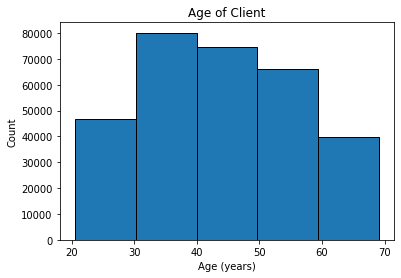

In [86]:
# Plot the distribution of ages in years
plt.hist(train['AGE'], edgecolor = 'k', bins = 5)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [88]:
def agebin(a):
        return 25
    elif 30< a < 40 :
        return 35
    elif 40<a<50: 
        return 45
    elif 50<a<60:
        return 55
    else:
        return 65

train['AGEBIN'] = train['AGE'].apply(agebin)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [ ]:
train['AGEBIN']

In [ ]:
sns.countplot(train['AGEBIN'], hue = train['TARGET'])
plt.xticks(np.arange(5), ( '20 - 30', '30-40', '40-50', '50-60','65+'),rotation = 'horizontal')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [ ]:

for index, category in enumerate(categorical):
    plt.subplot(plot_count, 1, index + 1)

    order = sorted(train['AGEBIN'].unique())
    ax = sns.countplot(category, data=data, hue="churn", order=order)
    ax.set_ylabel('')

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [ ]:
for i in df[df['NAME_TYPE_SUITE'].isnull()]:
    df['NAME_TYPE_SUITE'].replace(to_replace=np.nan,value='Family',inplace=True) 

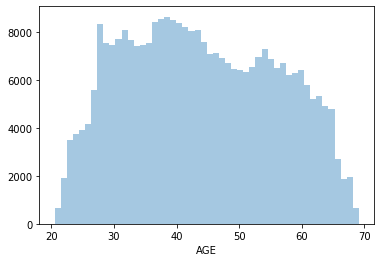

In [1071]:
sns.distplot(train['AGE'], kde = False,  )

In [1045]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [1047]:
giniPred1 = giniDecisionTree.predict(X)

In [1048]:
print('Accuracy Score: ',accuracy_score(y, giniPred1))

Accuracy Score:  0.5666529002214555


In [1049]:
print(metrics.classification_report(y,giniPred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70    282686
           1       0.11      0.64      0.19     24825

    accuracy                           0.57    307511
   macro avg       0.53      0.60      0.45    307511
weighted avg       0.88      0.57      0.66    307511



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train) 

In [510]:
train.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [511]:
train.FONDKAPREMONT_MODE.value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [512]:
train.HOUSETYPE_MODE.value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [513]:
train.WALLSMATERIAL_MODE.value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [514]:
train.EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

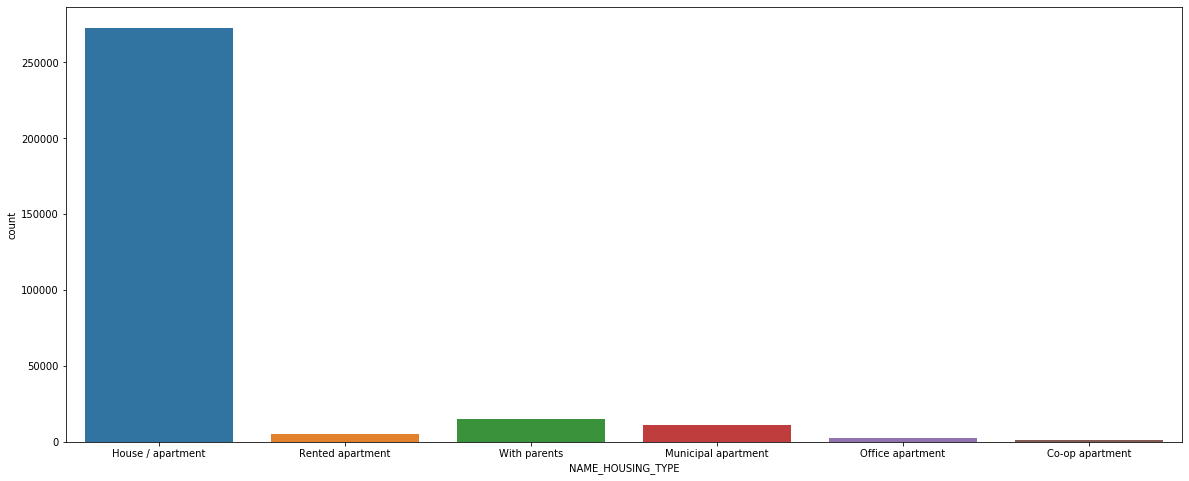

In [515]:
plt.figure(figsize=(20,8))
sns.countplot(train.NAME_HOUSING_TYPE)

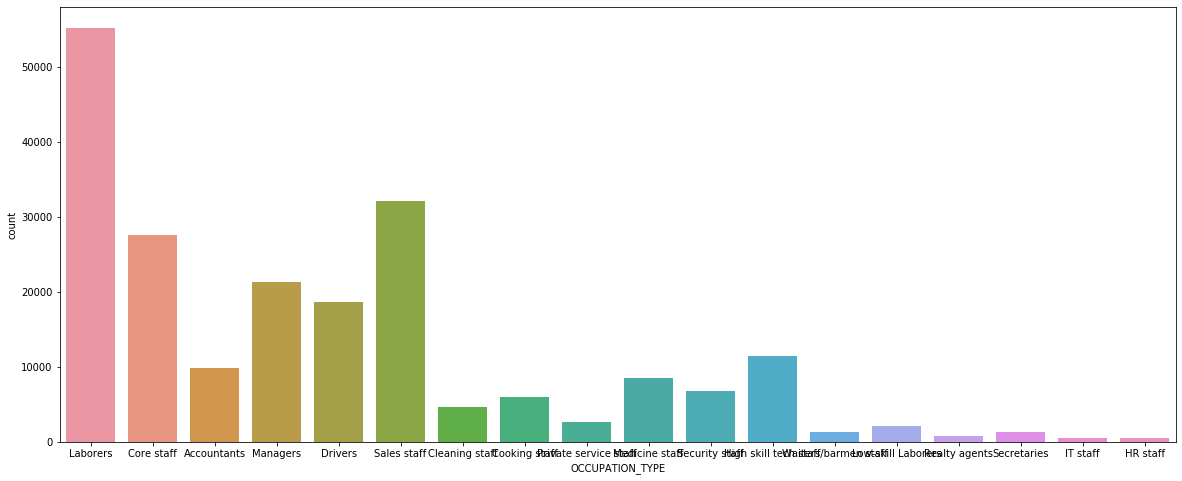

In [21]:

plt.figure(figsize=(20,8))
sns.countplot(train.OCCUPATION_TYPE)

In [22]:
train.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
train.ORGANIZATION_TYPE.value_counts() # need feature engg

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [24]:
categorical_data.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


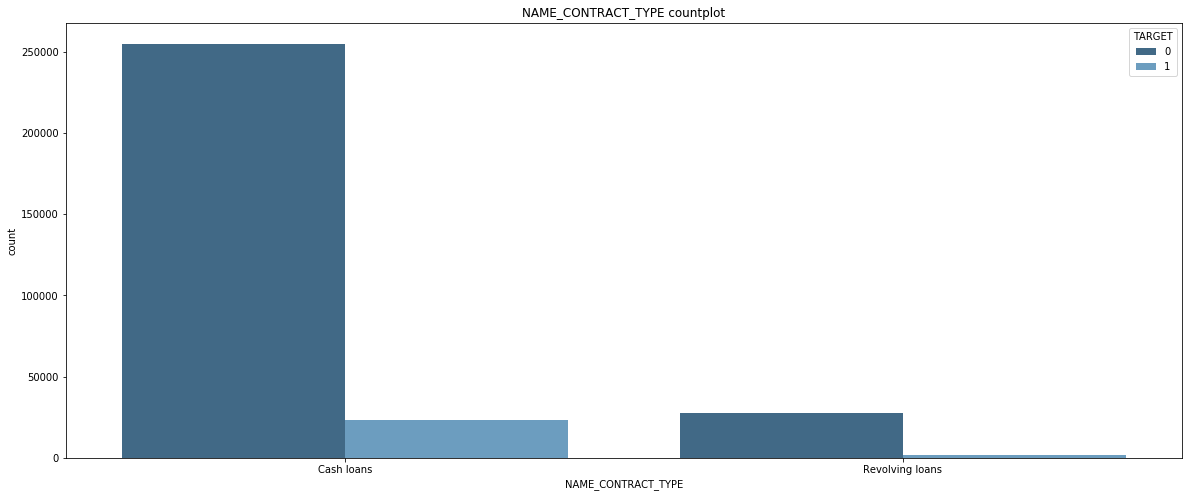

In [25]:
plt.figure(figsize=(20,8))

plt.title('NAME_CONTRACT_TYPE countplot')
sns.countplot(train.NAME_CONTRACT_TYPE, palette=("Blues_d"),hue = train.TARGET)




NameError: name 'countplot' is not defined

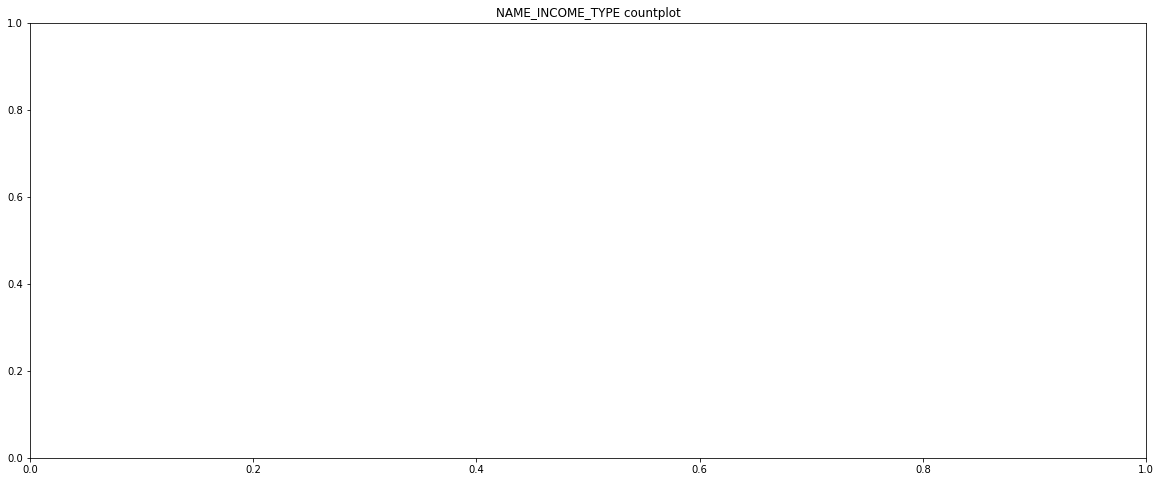

In [26]:
plt.figure(figsize=(20,8))

plt.title('NAME_INCOME_TYPE countplot')
countplot(train.NAME_INCOME_TYPE, palette=("Blues_d"),hue = train.TARGET)

In [ ]:

x, y, hue = "NAME_INCOME_TYPE" , train.NAME_INCOME_TYPE.count()"TARGET"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [ ]:
train[NAME_INCOME_TYPE]   -- X
train[NAME_INCOME_TYPE].count() - Y

In [ ]:
sns.barplot(x=train['NAME_INCOME_TYPE'], y=train['NAME_INCOME_TYPE'].count() , estimator=lambda x: sum(x==0)*100.0/len(x))

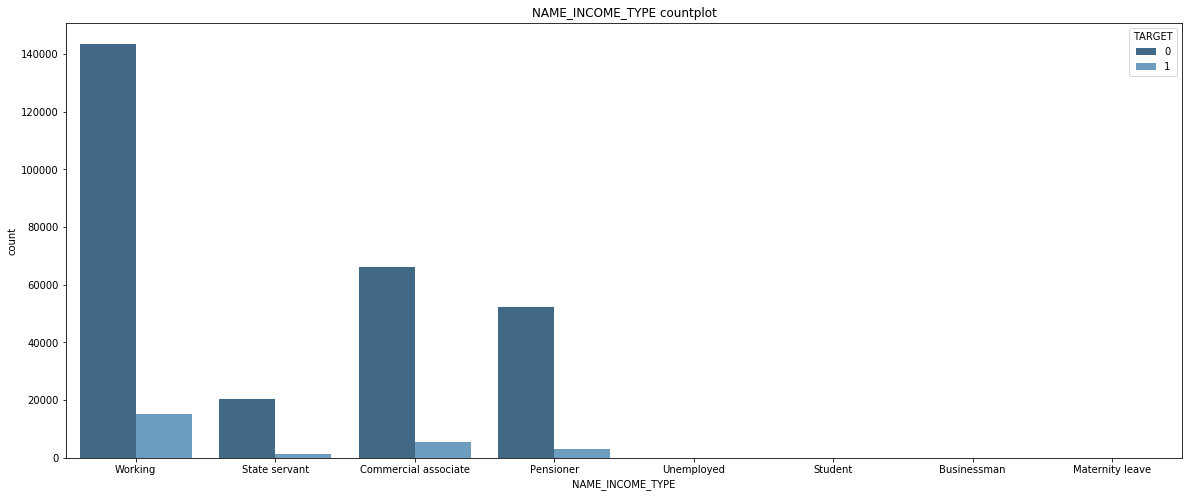

In [27]:
plt.figure(figsize=(20,8))

plt.title('NAME_INCOME_TYPE countplot')
sns.countplot(train.NAME_INCOME_TYPE, palette=("Blues_d"),hue = train.TARGET)

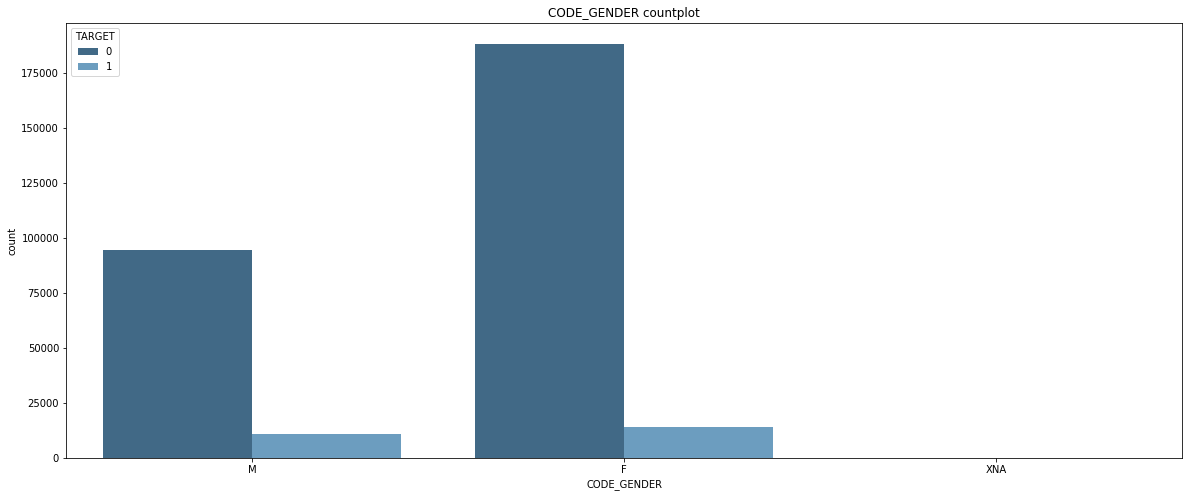

In [28]:
plt.figure(figsize=(20,8))

plt.title('CODE_GENDER countplot')
sns.countplot(train.CODE_GENDER, palette=("Blues_d"),hue = train.TARGET)

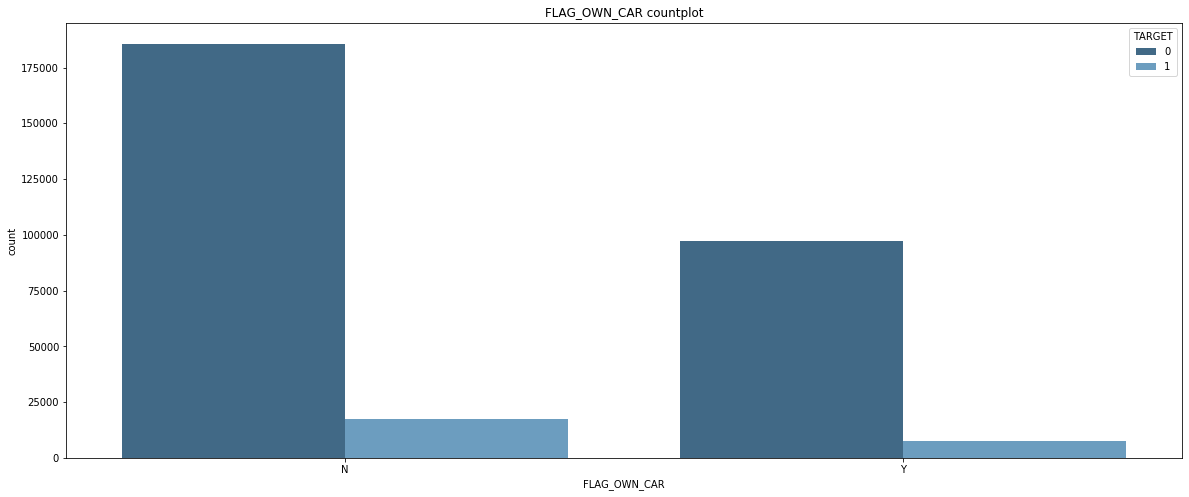

In [29]:
plt.figure(figsize=(20,8))

plt.title('FLAG_OWN_CAR countplot')
sns.countplot(train.FLAG_OWN_CAR, palette=("Blues_d"),hue = train.TARGET)

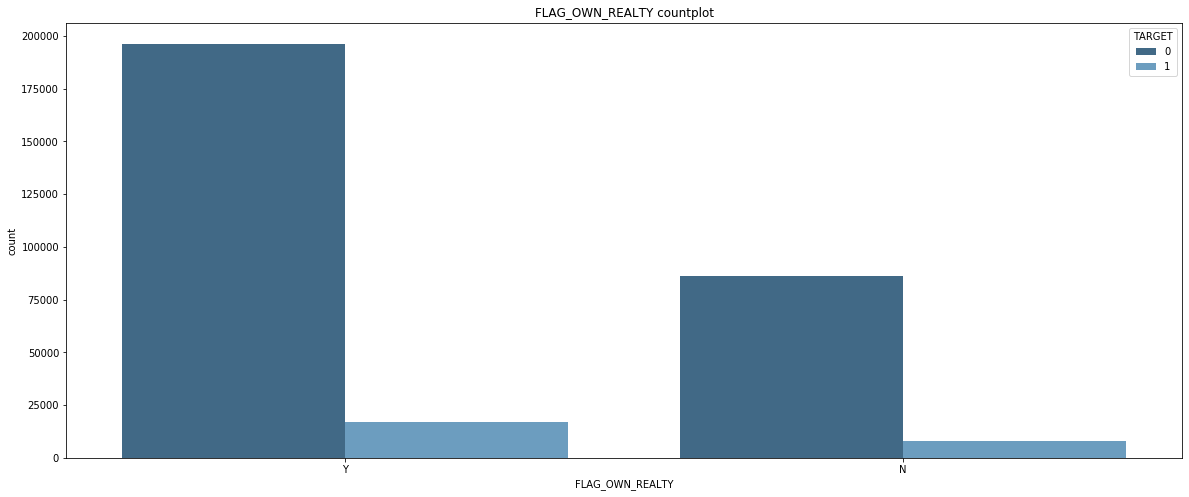

In [30]:
plt.figure(figsize=(20,8))

plt.title('FLAG_OWN_REALTY countplot')
sns.countplot(train.FLAG_OWN_REALTY, palette=("Blues_d"),hue = train.TARGET, )

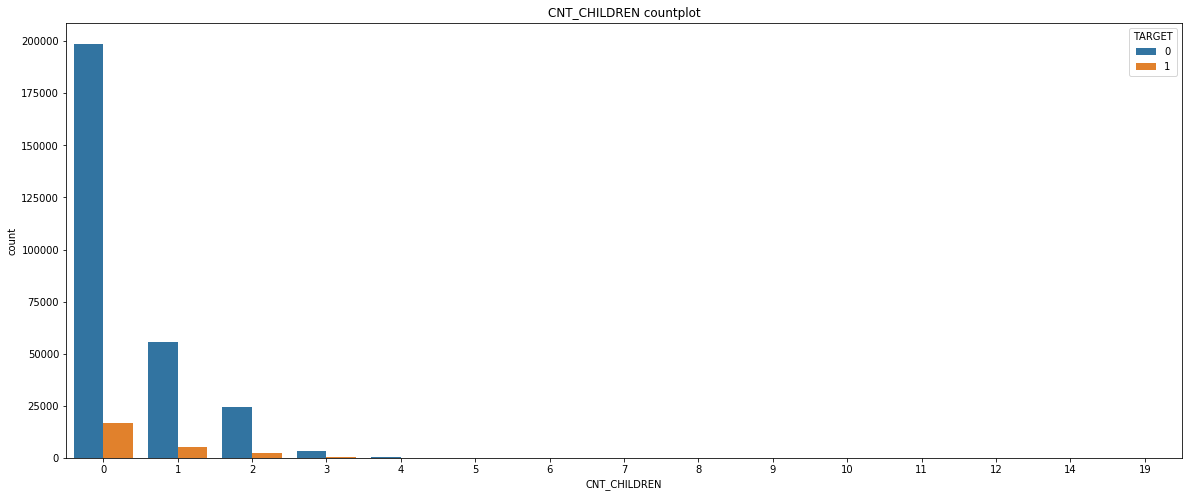

In [31]:
plt.figure(figsize=(20,8))

plt.title('CNT_CHILDREN countplot')
sns.countplot(train.CNT_CHILDREN, hue=  train['TARGET'])

# Visualization of Numerical Features

In [32]:
numeric_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [33]:
numeric_data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [34]:
numeric_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [35]:
numeric_data.shape

(307511, 106)

In [36]:


# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexe

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
Median value for loan that was not repaid = 0.3791
Median value for loan that was repaid =     0.5460


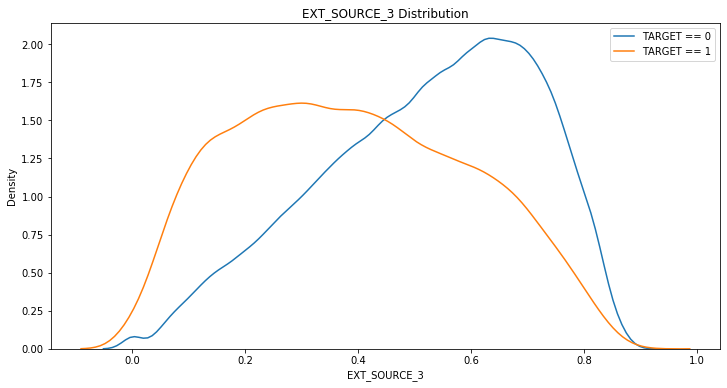

In [37]:
kde_target('EXT_SOURCE_3', train)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between AMT_INCOME_TOTAL and the TARGET is -0.0040
Median value for loan that was not repaid = 135000.0000
Median value for loan that was repaid =     148500.0000


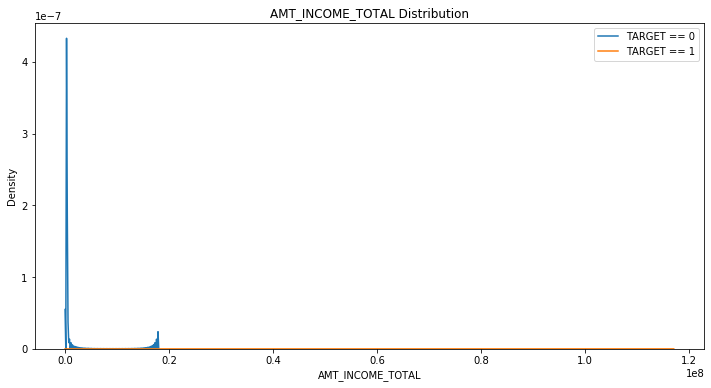

In [38]:
kde_target('AMT_INCOME_TOTAL', train)

doesn't seem to impact target , but domain wise important

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between AMT_CREDIT and the TARGET is -0.0304
Median value for loan that was not repaid = 497520.0000
Median value for loan that was repaid =     517788.0000


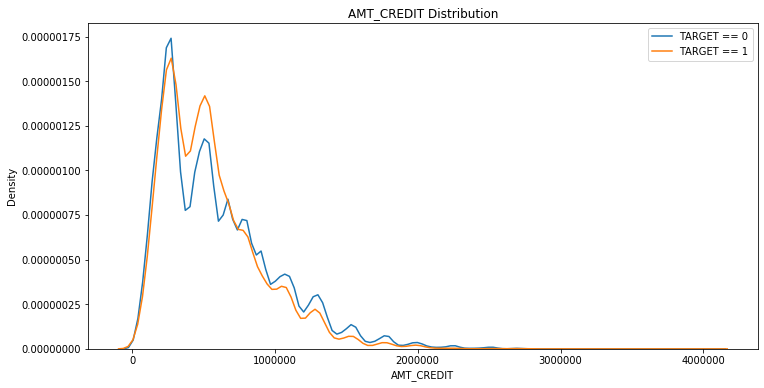

In [39]:
kde_target('AMT_CREDIT', train)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between AMT_ANNUITY and the TARGET is -0.0128
Median value for loan that was not repaid = 25263.0000
Median value for loan that was repaid =     24876.0000


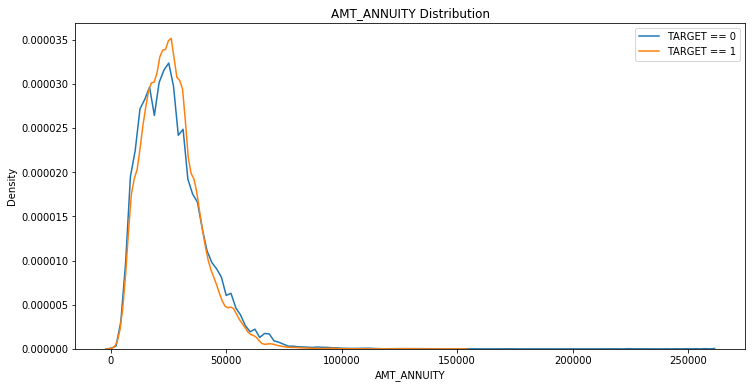

In [40]:
kde_target('AMT_ANNUITY', train)

seems to be an important feature because when AMT_ANNUITY is more than 15k, target is 0

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between AMT_GOODS_PRICE and the TARGET is -0.0396
Median value for loan that was not repaid = 450000.0000
Median value for loan that was repaid =     450000.0000


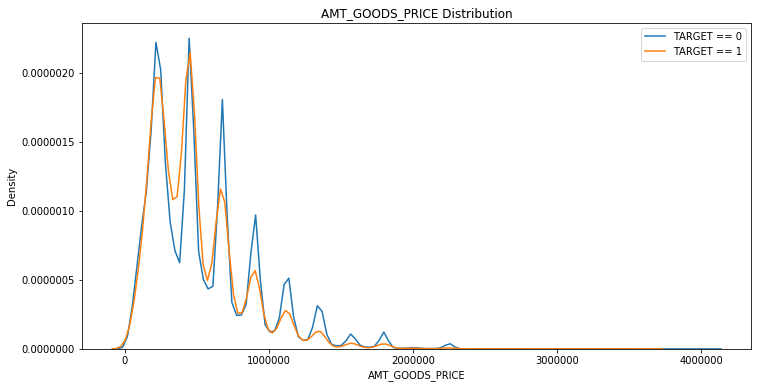

In [41]:
kde_target('AMT_GOODS_PRICE', train)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between REGION_POPULATION_RELATIVE and the TARGET is -0.0372
Median value for loan that was not repaid = 0.0186
Median value for loan that was repaid =     0.0188


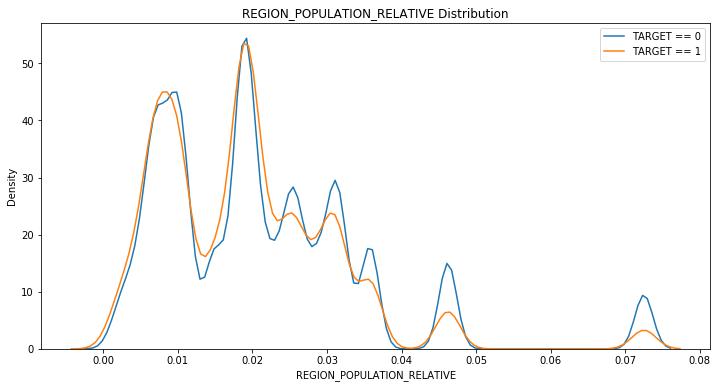

In [42]:
kde_target('REGION_POPULATION_RELATIVE', train)

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between OWN_CAR_AGE and the TARGET is 0.0376
Median value for loan that was not repaid = 11.0000
Median value for loan that was repaid =     9.0000


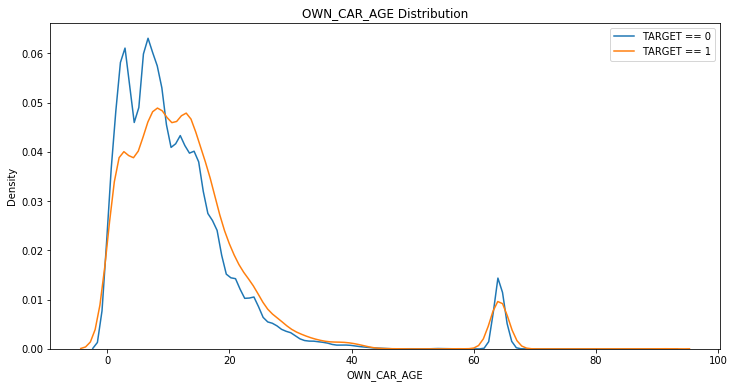

In [43]:
kde_target('OWN_CAR_AGE', train)

seems to be important

/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/vyshnavimateti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/

The correlation between REGION_RATING_CLIENT and the TARGET is 0.0589
Median value for loan that was not repaid = 2.0000
Median value for loan that was repaid =     2.0000


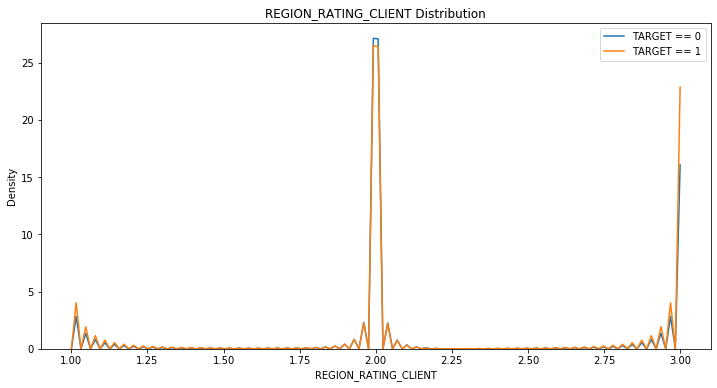

In [44]:
kde_target('REGION_RATING_CLIENT', train)

In [45]:
numeric_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

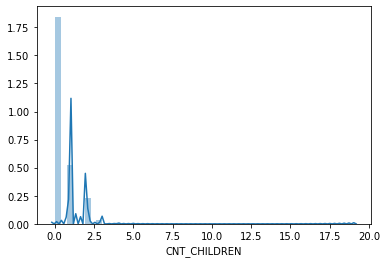

In [46]:
sns.distplot(numeric_data['CNT_CHILDREN'])

In [47]:
numeric_data['CNT_CHILDREN'].skew()

1.9746044696947922

In [1063]:
sns.distplot(train['AGE'], kde = False , bins = 20,  )

TypeError: distplot() got an unexpected keyword argument 'edgecolor'

In [1053]:
train['AGE']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE, Length: 307511, dtype: float64

In [ ]:

Scores With minmax scaler for non normalised features, get dummies for all columns, and with feature engineering 
LR —> ROC - 0.72, F1score for 0 - 0.81, for 1 -0.26, accuracy score- 0.69
DT —> ROC - 0.62, F1score for 0 - 0.70, for 1 - 0.19, accuracy_score - 0.56
RF —> ROC - 0.57, F1score for 0 - 0.94, for 1 -0.12, accuracy score- 0.88


Scores with Label encoder for multi class variables and get dummies for binary variables, with feature engineering , Standard scaler
LR —> ROC = 0.54, F1score for 0 - 0.80, for 1 - 0.25, accuracy score - 0.68 

scores after feature engineering, standard scalar , get dummies for all features :
RF -  ROC - 50.63, F1score for 0 - 0.96, for 1 -0.03, accuracy score- 0.92
AdaBoost - ROC - 56.01, F1score for 0 - 0.93, for 1 -0.19, accuracy score- 0.87
Gradient Boosting - ROC - 51.04, F1score for 0 - 0.96, for 1 -0.05, accuracy score- 0.92
Bagging - ROC - 51.55, F1score for 0 - 0.95, for 1 -0.07, accuracy score- 0.91
XGBoost - ROC - 51.59, F1score for 0 - 0.96, for 1 -0.07, accuracy score- 0.92 

With out null values

--> Shape (8602, 122)
-->before feature Integration
LR —> ROC - 0.75, F1score for 0 - 0.74, for 1 -0.76, accuracy score- 0.75
DT —> ROC - 0.925, F1score for 0 - 0.92, for 1 - 0.93, accuracy_score - 0.93 

-->After feature Integration and Standard Scalar
 LR —> ROC - 0.741, F1score for 0 - 0.73, for 1 -0.75, accuracy score- 0.74
 DT—> ROC - 0.917, F1score for 0 - 0.92, for 1 - 0.92, accuracy_score - 0.92

->After feature Integration and MinMax
 LR —> ROC - 0.735, F1score for 0 - 0.72, for 1 -0.75, accuracy score- 0.74
 DT(Default)—> ROC - 0.906, F1score for 0 - 0.90, for 1 - 0.90, accuracy_score - 0.91 